In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
import os 
import seaborn as sns #for styling the plots
import warnings
import urllib.request
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install geopandas

     |████████████████████████████████| 1.0MB 9.0MB/s 
     |████████████████████████████████| 6.5MB 20.5MB/s 
     |████████████████████████████████| 15.3MB 270kB/s 


In [3]:
pip install pyexcel

     |████████████████████████████████| 92kB 5.7MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 


Combine all SF files

In [4]:
import time
import os
import pyexcel as px

In [5]:
directory = "/content/drive/MyDrive/PUIteam/rawbike"

outfile_name = "/content/drive/MyDrive/PUIteam/result_combine.csv"

input_files=os.listdir(directory)

CONTENTS = []

In [33]:
for filename in input_files:
    if ".csv" not in filename:
        continue

    data_array=px.get_array(file_name=directory + "/" + filename)

    header = data_array[0]
    data_array = data_array[1:]

    if len(CONTENTS) == 0:
        CONTENTS.append(header)

    CONTENTS += data_array

    px.save_as(array=CONTENTS, dest_file_name=outfile_name)
print("process done")

process done


In [121]:
SFall.shape

(1380643, 13)

In [176]:
SFall7= pd.read_csv('/content/drive/MyDrive/PUIteam/rawbike/202007-baywheels-tripdata.csv')

In [177]:
SFall7.shape

(155248, 13)

In [180]:
SFall10= pd.read_csv('/content/drive/MyDrive/PUIteam/rawbike/202010-baywheels-tripdata.csv')
SFall10.shape

(167541, 13)

In [181]:
SFall= pd.read_csv('/content/drive/MyDrive/PUIteam/result_combine1.csv')

In [182]:
SFall.shape

(1072705, 13)

In [183]:
SFall.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,DCFF7274CCC43160,electric_bike,2020-11-06 15:00:35,2020-11-06 15:07:26,NaN,NaN,NaN,NaN,37.77,-122.51,37.76,-122.51,member
1,960CEA623DF863B1,electric_bike,2020-11-09 18:48:02,2020-11-09 19:05:18,NaN,NaN,NaN,NaN,37.79,-122.40,37.77,-122.43,member
2,E1D654DE250A8EC2,electric_bike,2020-11-24 08:09:45,2020-11-24 08:29:43,NaN,NaN,NaN,NaN,37.78,-122.43,37.79,-122.41,casual
3,F50714E7EDD03F99,electric_bike,2020-11-24 13:00:08,2020-11-24 13:25:40,NaN,NaN,NaN,NaN,37.79,-122.49,37.76,-122.47,casual
4,6F8FD01D3AB856D7,electric_bike,2020-11-23 20:21:29,2020-11-23 20:37:35,NaN,NaN,NaN,NaN,37.80,-122.41,37.78,-122.42,casual


In [184]:
SFall = SFall[SFall['start_lat'].notnull()]
SFall = SFall[SFall['start_lng'].notnull()]
SFall = SFall[SFall['end_lng'].notnull()]
SFall = SFall[SFall['end_lat'].notnull()]



In [185]:
SFall.shape

(1071601, 13)

In [186]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
from shapely.geometry import Point
import geopy.distance
from geopy import distance
from geopy import Point
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import json
import urllib
import urllib.request

In [187]:
#SFall= SFall[SFall['displacement']!= 0.0]
SFall['duration']= (pd.to_datetime(SFall['ended_at'])-(pd.to_datetime(SFall['started_at']))).dt.total_seconds()
SFall =SFall[SFall['duration']<2500]
SFall.shape

(990335, 14)

In [188]:
SFall.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration'],
      dtype='object')

In [189]:
SFall = SFall[['rideable_type', 'started_at', 'ended_at',
       'member_casual']]

In [190]:
SFall.head()

,rideable_type,started_at,ended_at,member_casual
0,electric_bike,2020-11-06 15:00:35,2020-11-06 15:07:26,member
1,electric_bike,2020-11-09 18:48:02,2020-11-09 19:05:18,member
2,electric_bike,2020-11-24 08:09:45,2020-11-24 08:29:43,casual
3,electric_bike,2020-11-24 13:00:08,2020-11-24 13:25:40,casual
4,electric_bike,2020-11-23 20:21:29,2020-11-23 20:37:35,casual


In [191]:
weather= pd.read_csv('/content/drive/MyDrive/PUIteam/weatherSF2020.csv')

In [192]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TMAX,TMIN
0,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/1/2020,0.0,58,49
1,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/2/2020,0.0,62,48
2,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/3/2020,0.0,60,47
3,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/4/2020,0.0,58,50
4,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,1/5/2020,0.0,58,45
...,...,...,...,...,...,...,...,...,...
468,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,4/13/2021,0.0,56,48
469,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,4/14/2021,0.0,61,48
470,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,4/15/2021,0.0,57,48
471,USW00023272,"SAN FRANCISCO DOWNTOWN, CA US",37.7705,-122.4269,45.7,4/16/2021,0.0,55,47


In [193]:
from datetime import date, datetime

In [194]:
SFall['started_at'].max()

'2021-02-28 23:59:56'

from July 2020 to Feb 2021

In [195]:
SFall['DATE'] = pd.to_datetime(SFall['started_at']).dt.date
weather['DATE'] = pd.to_datetime(weather['DATE']).dt.date
weather2 = weather.loc[weather['DATE']>= SFall['DATE'].min()]
weather2 = weather2.loc[weather2['DATE']<= SFall['DATE'].max()]
#weather['month'] = weather['DATE'].dt.month
#weather2 = weather.loc[weather['month']==1|2|7|8|9|10|11|12]
#weather2 = weather2.loc[weather2['month'].isin([1,2,7,8,9,10,11,12])]
weather2 = weather2[['DATE', 'PRCP',
       'TMAX', 'TMIN']]
weather2

,DATE,PRCP,TMAX,TMIN
182,2020-07-01,0.0,67,54
183,2020-07-02,0.0,67,54
184,2020-07-03,0.0,62,54
185,2020-07-04,0.0,71,54
186,2020-07-05,0.0,70,56
...,...,...,...,...
420,2021-02-24,0.0,70,48
421,2021-02-25,0.0,64,51
422,2021-02-26,0.0,58,46
423,2021-02-27,0.0,59,44


In [196]:
sf_ebike= SFall.loc[SFall['rideable_type'].isin (['electric_bike'])]
sf_cbike= SFall.loc[SFall['rideable_type'].isin (['classic_bike','docked_bike'])]
#sf_dbike= SFall.loc[SFall['rideable_type'].isin (['docked_bike'])]

In [197]:
sf_mbike= SFall.loc[SFall['member_casual'].isin (['member'])]
sf_cabike= SFall.loc[SFall['member_casual'].isin (['casual'])]

In [198]:
member = sf_mbike[['rideable_type','DATE']].groupby(by='rideable_type').count()
member = member.rename(columns={'DATE':'member'}, inplace= False)
member['casual'] = sf_cabike[['DATE','rideable_type']].groupby(by='rideable_type').count()
member

,member,casual
rideable_type,,
classic_bike,56617,40805
docked_bike,102646,97131
electric_bike,286633,406503


In [ ]:
member[]

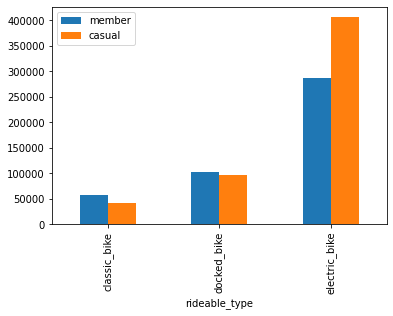

In [199]:
member.plot.bar()

In [200]:
dailycount = SFall[['DATE','rideable_type']].groupby(by='DATE').count()
dailycount = dailycount.rename(columns={'rideable_type':'totalcount'})
dailycount['e-bike'] = sf_ebike[['DATE','rideable_type']].groupby(by='DATE').count()
dailycount['c-bike'] = sf_cbike[['DATE','rideable_type']].groupby(by='DATE').count()
#dailycount['d-bike'] = sf_dbike[['DATE','rideable_type']].groupby(by='DATE').count()


In [201]:
import matplotlib.pyplot as plt

In [202]:
dailycount

,totalcount,e-bike,c-bike
DATE,,,
2020-07-01,4370,3104,1266
2020-07-02,4671,3331,1340
2020-07-03,4615,3217,1398
2020-07-04,4911,3326,1585
2020-07-05,4387,2923,1464
...,...,...,...
2021-02-24,3942,2794,1148
2021-02-25,3920,2775,1145
2021-02-26,4153,2970,1183


In [203]:
dailycount.reset_index(inplace = True)

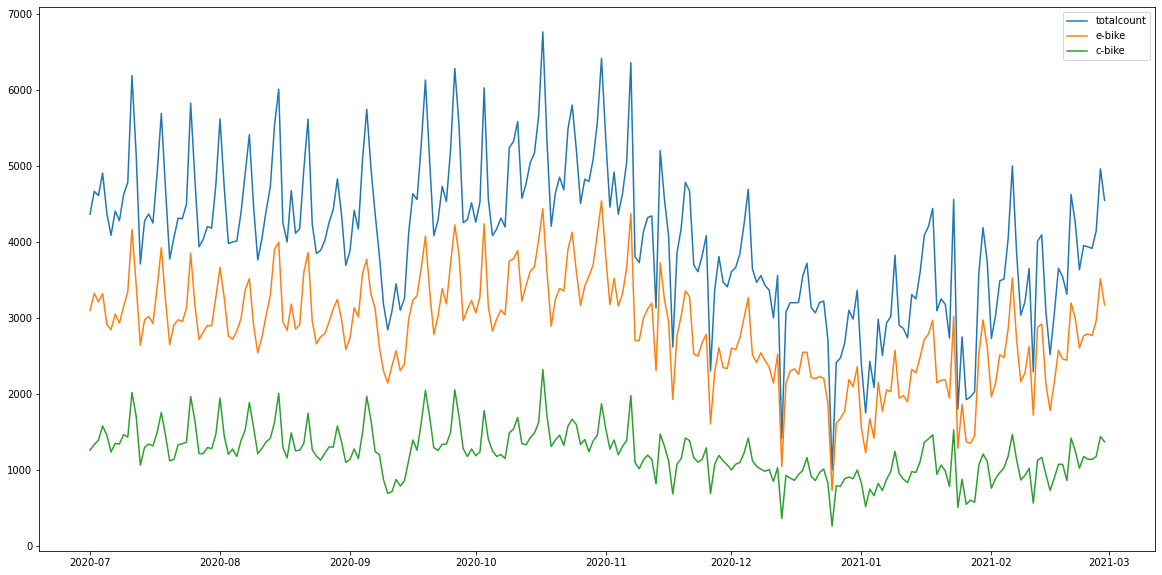

In [204]:
plt.figure(figsize=(20,10))
plt.plot(dailycount['DATE'],dailycount['totalcount'], label='totalcount')
plt.plot(dailycount['DATE'],dailycount['e-bike'],label='e-bike')
plt.plot(dailycount['DATE'],dailycount['c-bike'],label='c-bike')
#plt.plot(dailycount['DATE'],dailycount['d-bike'],label='d-bike')
plt.legend();
plt.show()

In [205]:
dailycount['DATE'] = pd.to_datetime(dailycount['DATE'])
weather2['DATE'] = pd.to_datetime(weather2['DATE'])

In [206]:
dailycount['month'] = dailycount['DATE'].dt.month
dailycount['year'] = dailycount['DATE'].dt.year
dailycount['Date'] = pd.to_datetime(dailycount['month'].astype(str) + dailycount['year'].astype(str), format='%m%Y')
dailycount.head()

,DATE,totalcount,e-bike,c-bike,month,year,Date
0,2020-07-01,4370,3104,1266,7,2020,2020-07-01
1,2020-07-02,4671,3331,1340,7,2020,2020-07-01
2,2020-07-03,4615,3217,1398,7,2020,2020-07-01
3,2020-07-04,4911,3326,1585,7,2020,2020-07-01
4,2020-07-05,4387,2923,1464,7,2020,2020-07-01


In [207]:
weather2['month'] = weather2['DATE'].dt.month
weather2['year'] = weather2['DATE'].dt.year
weather2['Date'] = pd.to_datetime(weather2['month'].astype(str) + weather2['year'].astype(str), format='%m%Y')
weather2.head()

,DATE,PRCP,TMAX,TMIN,month,year,Date
182,2020-07-01,0.0,67,54,7,2020,2020-07-01
183,2020-07-02,0.0,67,54,7,2020,2020-07-01
184,2020-07-03,0.0,62,54,7,2020,2020-07-01
185,2020-07-04,0.0,71,54,7,2020,2020-07-01
186,2020-07-05,0.0,70,56,7,2020,2020-07-01


In [208]:
weather2.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'month', 'year', 'Date'], dtype='object')

In [209]:
weathermonthly = weather2[['PRCP', 'TMAX', 'TMIN', 'Date']].groupby(by='Date').mean()
weathermonthly

,PRCP,TMAX,TMIN
Date,,,
2020-07-01,0.000968,66.000000,54.870968
2020-08-01,0.000323,70.064516,56.741935
2020-09-01,0.000000,72.933333,58.133333
2020-10-01,0.000323,73.870968,56.483871
2020-11-01,0.016333,62.900000,49.333333
2020-12-01,0.066774,59.548387,47.225806
2021-01-01,0.090968,58.612903,47.516129
2021-02-01,0.061071,60.821429,47.571429


In [210]:
dailycount.columns

Index(['DATE', 'totalcount', 'e-bike', 'c-bike', 'month', 'year', 'Date'], dtype='object')

In [211]:
monthlycount = dailycount[['totalcount', 'e-bike', 'c-bike', 'Date']].groupby(by='Date').sum()
monthlycount

,totalcount,e-bike,c-bike
Date,,,
2020-07-01,141200,97327,43873
2020-08-01,139472,95952,43520
2020-09-01,133075,93606,39469
2020-10-01,155808,110265,45543
2020-11-01,124287,88154,36133
2020-12-01,98947,69649,29298
2021-01-01,94294,64925,29369
2021-02-01,103252,73258,29994


In [212]:
weather2.set_index('DATE')
weather2

,DATE,PRCP,TMAX,TMIN,month,year,Date
182,2020-07-01,0.0,67,54,7,2020,2020-07-01
183,2020-07-02,0.0,67,54,7,2020,2020-07-01
184,2020-07-03,0.0,62,54,7,2020,2020-07-01
185,2020-07-04,0.0,71,54,7,2020,2020-07-01
186,2020-07-05,0.0,70,56,7,2020,2020-07-01
...,...,...,...,...,...,...,...
420,2021-02-24,0.0,70,48,2,2021,2021-02-01
421,2021-02-25,0.0,64,51,2,2021,2021-02-01
422,2021-02-26,0.0,58,46,2,2021,2021-02-01
423,2021-02-27,0.0,59,44,2,2021,2021-02-01


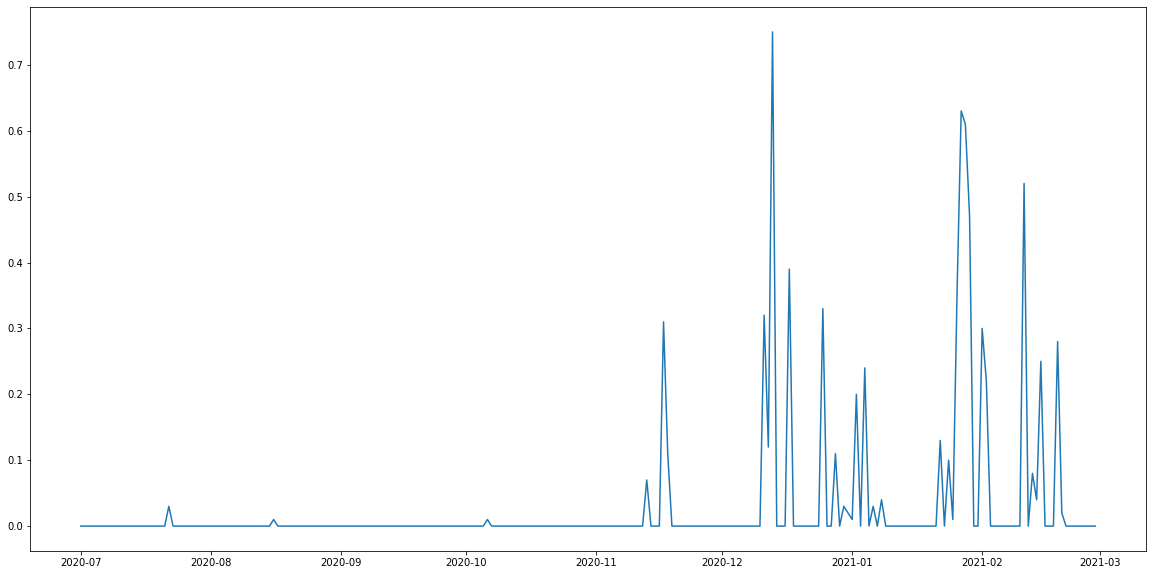

In [213]:
plt.figure(figsize=(20,10))
plt.plot(weather2['DATE'],weather2['PRCP'])
plt.show()

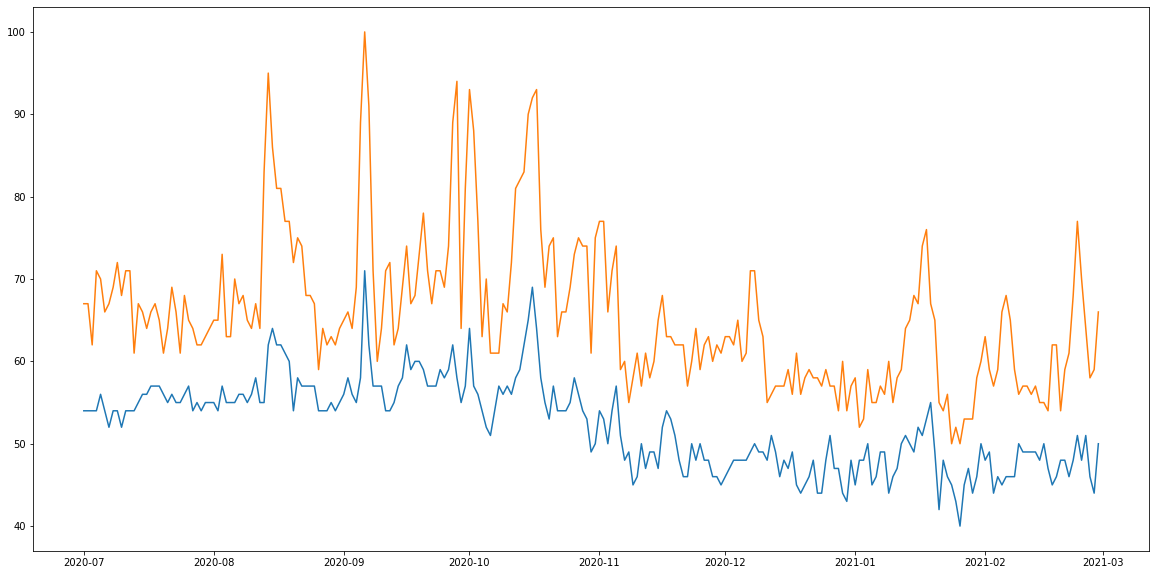

In [214]:
plt.figure(figsize=(20,10))
plt.plot(weather2['DATE'],weather2['TMIN'])
plt.plot(weather2['DATE'],weather2['TMAX'])
plt.show()

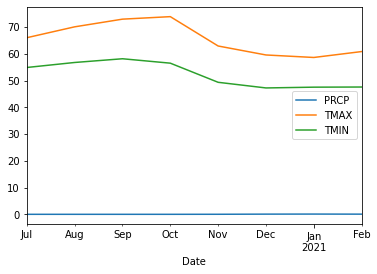

In [215]:
weathermonthly.plot()

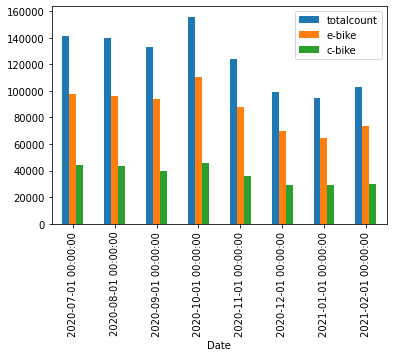

In [216]:
monthlycount.plot.bar()

In [237]:
monthlycount

,totalcount,e-bike,c-bike
Date,,,
2020-07-01,141200,97327,43873
2020-08-01,139472,95952,43520
2020-09-01,133075,93606,39469
2020-10-01,155808,110265,45543
2020-11-01,124287,88154,36133
2020-12-01,98947,69649,29298
2021-01-01,94294,64925,29369
2021-02-01,103252,73258,29994


In [238]:
monthly = monthlycount['e-bike']/monthlycount['totalcount']
monthly

Date
2020-07-01    0.689285
2020-08-01    0.687966
2020-09-01    0.703408
2020-10-01    0.707698
2020-11-01    0.709278
2020-12-01    0.703902
2021-01-01    0.688538
2021-02-01    0.709507
dtype: float64

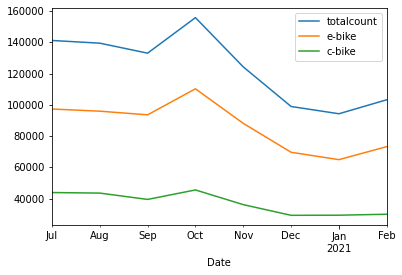

In [217]:
monthlycount.plot()

In [218]:
weather2['DATE'] = pd.to_datetime(weather2['DATE'])
weather2['DATE']

182   2020-07-01
183   2020-07-02
184   2020-07-03
185   2020-07-04
186   2020-07-05
         ...    
420   2021-02-24
421   2021-02-25
422   2021-02-26
423   2021-02-27
424   2021-02-28
Name: DATE, Length: 243, dtype: datetime64[ns]

In [219]:
dailycount['DATE']

0     2020-07-01
1     2020-07-02
2     2020-07-03
3     2020-07-04
4     2020-07-05
         ...    
238   2021-02-24
239   2021-02-25
240   2021-02-26
241   2021-02-27
242   2021-02-28
Name: DATE, Length: 243, dtype: datetime64[ns]

In [220]:
dailySF = dailycount.merge(weather2,left_on='DATE', right_on='DATE')
dailySF.head()

,DATE,totalcount,e-bike,c-bike,month_x,year_x,Date_x,PRCP,TMAX,TMIN,month_y,year_y,Date_y
0,2020-07-01,4370,3104,1266,7,2020,2020-07-01,0.0,67,54,7,2020,2020-07-01
1,2020-07-02,4671,3331,1340,7,2020,2020-07-01,0.0,67,54,7,2020,2020-07-01
2,2020-07-03,4615,3217,1398,7,2020,2020-07-01,0.0,62,54,7,2020,2020-07-01
3,2020-07-04,4911,3326,1585,7,2020,2020-07-01,0.0,71,54,7,2020,2020-07-01
4,2020-07-05,4387,2923,1464,7,2020,2020-07-01,0.0,70,56,7,2020,2020-07-01


In [221]:
dailySF['ebikeNom'] = dailySF['e-bike']/dailySF['totalcount']
dailySF['cbikeNom'] = dailySF['c-bike']/dailySF['totalcount']
#dailySF['dbikeNom'] = dailySF['d-bike']/dailySF['totalcount']
dailySF.head()

,DATE,totalcount,e-bike,c-bike,month_x,year_x,Date_x,PRCP,TMAX,TMIN,month_y,year_y,Date_y,ebikeNom,cbikeNom
0,2020-07-01,4370,3104,1266,7,2020,2020-07-01,0.0,67,54,7,2020,2020-07-01,0.710297,0.289703
1,2020-07-02,4671,3331,1340,7,2020,2020-07-01,0.0,67,54,7,2020,2020-07-01,0.713124,0.286876
2,2020-07-03,4615,3217,1398,7,2020,2020-07-01,0.0,62,54,7,2020,2020-07-01,0.697075,0.302925
3,2020-07-04,4911,3326,1585,7,2020,2020-07-01,0.0,71,54,7,2020,2020-07-01,0.677255,0.322745
4,2020-07-05,4387,2923,1464,7,2020,2020-07-01,0.0,70,56,7,2020,2020-07-01,0.666287,0.333713


In [222]:
dailySF[['totalcount','PRCP', 'TMAX', 'TMIN',
       'ebikeNom', 'cbikeNom']].corr()

,totalcount,PRCP,TMAX,TMIN,ebikeNom,cbikeNom
totalcount,1.000000,-0.472713,0.609172,0.572546,-0.230960,0.230960
PRCP,-0.472713,1.000000,-0.303188,-0.239195,0.211085,-0.211085
TMAX,0.609172,-0.303188,1.000000,0.776467,-0.114128,0.114128
TMIN,0.572546,-0.239195,0.776467,1.000000,-0.108049,0.108049
ebikeNom,-0.230960,0.211085,-0.114128,-0.108049,1.000000,-1.000000
cbikeNom,0.230960,-0.211085,0.114128,0.108049,-1.000000,1.000000


In [223]:

from sklearn.linear_model import LinearRegression

In [224]:
lm = LinearRegression(fit_intercept=True).fit(dailySF[['cbikeNom']], dailySF['TMIN'])
lm.coef_, lm.intercept_

(array([28.467528]), 43.76828943276228)

In [225]:
#alternative implementation with fomulae
lm = smf.ols(formula='cbikeNom~TMIN', data = dailySF).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               cbikeNom   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.847
Date:                Sat, 01 May 2021   Prob (F-statistic):             0.0929
Time:                        19:45:31   Log-Likelihood:                 605.82
No. Observations:                 243   AIC:                            -1208.
Df Residuals:                     241   BIC:                            -1201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2776      0.013     21.731      0.0

In [226]:
lm.rsquared

0.011674525823934134

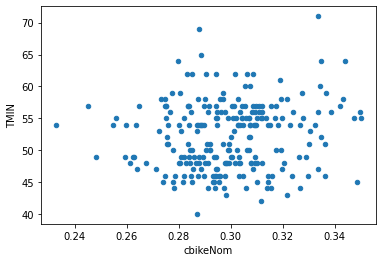

In [227]:
dailySF.plot(x='cbikeNom',y='TMIN',kind='scatter')

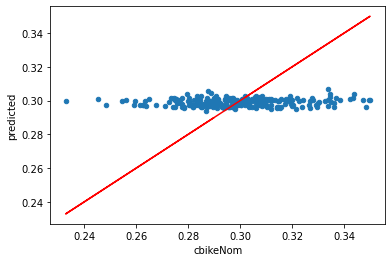

In [228]:
lm = smf.ols(formula='cbikeNom~TMIN', data = dailySF).fit()
dailySF['predicted']=lm.predict()
fig, ax = plt.subplots() #get axis to plot on
dailySF.plot(ax=ax,kind='scatter',x='cbikeNom', y= 'predicted') #show the data
ax.plot(dailySF['cbikeNom'],dailySF['cbikeNom'],'r-'); #show the regression line

In [229]:
#alternative implementation with fomulae
lm = smf.ols(formula='totalcount~TMAX', data = dailySF).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             totalcount   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sat, 01 May 2021   Prob (F-statistic):           4.49e-26
Time:                        19:45:32   Log-Likelihood:                -1960.1
No. Observations:                 243   AIC:                             3924.
Df Residuals:                     241   BIC:                             3931.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -230.6883    364.503     -0.633      0.5

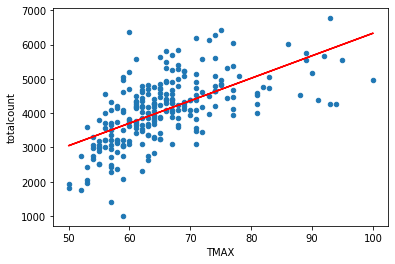

In [236]:
lm = smf.ols(formula='totalcount~TMAX', data = dailySF).fit()
dailySF['predicted']=lm.predict()
fig, ax = plt.subplots() #get axis to plot on
dailySF.plot(ax=ax,kind='scatter',x='TMAX', y= 'totalcount') #show the data
ax.plot(dailySF['TMAX'],dailySF['predicted'],'r-'); #show the regression line

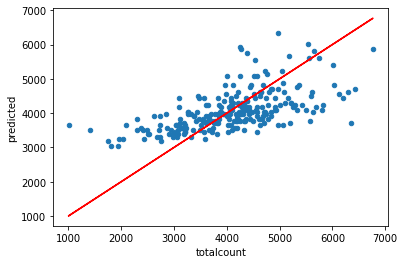

In [235]:
lm = smf.ols(formula='totalcount~TMAX', data = dailySF).fit()
dailySF['predicted']=lm.predict()
fig, ax = plt.subplots() #get axis to plot on
dailySF.plot(ax=ax,kind='scatter',x='totalcount', y= 'predicted') #show the data
ax.plot(dailySF['totalcount'],dailySF['totalcount'],'r-'); #show the regression line

In [231]:
stop

NameError: ignored

In [ ]:
SFall['displacement'] = 0
# Get the displacement for each route
for index, row in SFall.iterrows():
    start = Point((SFall['start_lat'][index], SFall['start_lng'][index]))
    finish = Point((SFall['end_lat'][index], SFall['end_lng'][index]))
    SFall['displacement'][index] = distance.geodesic(start, finish)
# print(bikes2['displacement'][index])
SFall.shape